# Projeto Final - Análise Exploratória de Dados (EDA) com Modelagem Supervisionada para TNDs

Este projeto aborda uma Análise Exploratória de Dados (EDA) e aplica técnicas de modelagem supervisionada para identificar possíveis traços de Transtornos do Espectro Autista (TEA) em crianças. Os dados são pré-processados, explorados visualmente e modelados usando técnicas de aprendizado de máquina.

1. **Importação de Bibliotecas**

    O código importa bibliotecas essenciais para a análise e modelagem, como pandas e numpy para manipulação de dados, matplotlib e seaborn para visualizações gráficas, e scikit-learn para pré-processamento e construção do modelo.
2. **Carregamento e Pré-processamento do Dataset**

    O dataset é carregado e contém colunas que representam respostas de um questionário (A1 a A10), idade (Age_Mons), pontuação (Qchat-10-Score), e características demográficas, como sexo (Sex), etnia (Ethnicity), presença de icterícia (Jaundice) e histórico familiar de TEA (Family_mem_with_ASD).
    A coluna alvo Class/ASD Traits é renomeada para facilitar o acesso (ASD_Traits).

3. **Análise Exploratória dos Dados**

    É gerada uma matriz de correlação entre variáveis numéricas para identificar relações. A correlação visualiza quais variáveis podem estar mais relacionadas ao escore TEA (Qchat-10-Score).
    

4. Pré-processamento

    As variáveis categóricas (Sex, Jaundice, Family_mem_with_ASD, ASD_Traits) são codificadas para numérico usando LabelEncoder, permitindo que o modelo utilize essas variáveis.
    As variáveis independentes (X) e a variável alvo (ASD_Traits) são separadas.
    Os dados são divididos em conjuntos de treino e teste (70% treino, 30% teste).

5. Normalização e Escalonamento

    As variáveis numéricas são normalizadas usando StandardScaler, que ajusta os dados para terem média zero e variância unitária, melhorando a performance de alguns modelos de aprendizado de máquina.

6. Escolha e Treinamento do Modelo

    O modelo Random Forest é instanciado e treinado com o conjunto de treino. O modelo Random Forest é adequado para dados tabulares, como neste projeto, pois lida bem com variáveis categóricas e dados desbalanceados.
    Após o treino, o modelo é avaliado no conjunto de teste. A acurácia, o relatório de classificação (que inclui métricas como precisão e recall) e a matriz de confusão são gerados para medir a qualidade do modelo.

7. Transformações e Modificações nos Dados

    A coluna Qchat-10-Score é convertida para valores numéricos, e valores ausentes são removidos.
    São criadas faixas etárias (Age_Group) e categorias de risco de pontuação (Qchat_Risk) para enriquecer a análise.
    É aplicado o One-Hot Encoding em variáveis categóricas recém-criadas (Age_Group e Qchat_Risk), facilitando a entrada no modelo.
    O balanceamento é realizado com a técnica SMOTE, gerando novas amostras sintéticas para a classe minoritária, que ajuda a reduzir o viés para a classe majoritária.

8. Avaliação do Impacto das Transformações

    A performance é reavaliada usando o modelo de Regressão Logística, permitindo comparar o desempenho entre o conjunto de dados original e o transformado.
    A acurácia e as métricas de classificação são comparadas antes e após as transformações, identificando o impacto das mudanças nos dados.

In [ ]:
# Projeto Final - Análise Exploratória de Dados (EDA) com Modelagem Supervisionada para TNDs

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Definição das colunas do DataFrame para o dataset de autismo
columns = {
    'A1_Score': [],
    'A2_Score': [],
    'A3_Score': [],
    'A4_Score': [],
    'A5_Score': [],
    'A6_Score': [],
    'A7_Score': [],
    'A8_Score': [],
    'A9_Score': [],
    'A10_Score': [],
    'Age_Mons': [],
    'Qchat-10-Score': [],
    'Sex': [],
    'Ethnicity': [],
    'Jaundice': [],
    'Family_mem_with_ASD': [],
    'Who completed the test': [],
    'Class/ASD Traits ': []  # Essa será renomeada para 'ASD_Traits' posteriormente
}

# Leitura do arquivo CSV com as colunas definidas
df = pd.read_csv('autism.csv', skiprows=1, names=columns)

# Renomeando a coluna alvo para facilitar o acesso
df.rename(columns={'Class/ASD Traits ': 'ASD_Traits'}, inplace=True)

# Verificando se o DataFrame foi carregado corretamente
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


#Analise Exploratória dos dados

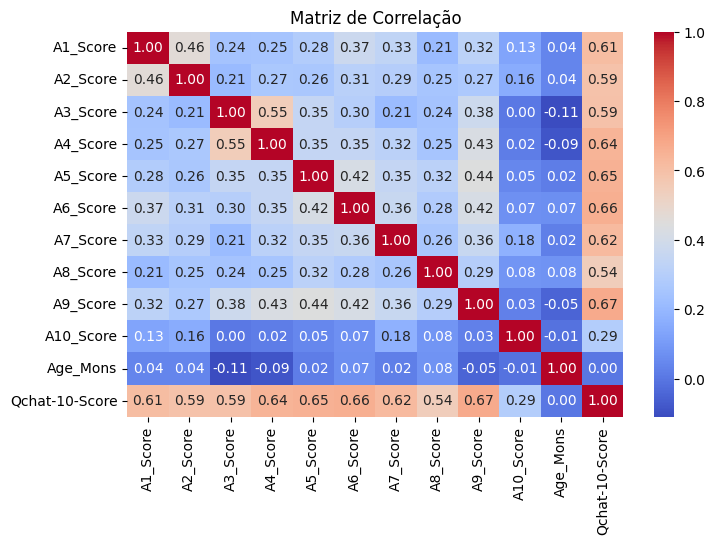

In [ ]:
# Selecionar apenas colunas numéricas para calcular a correlação
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

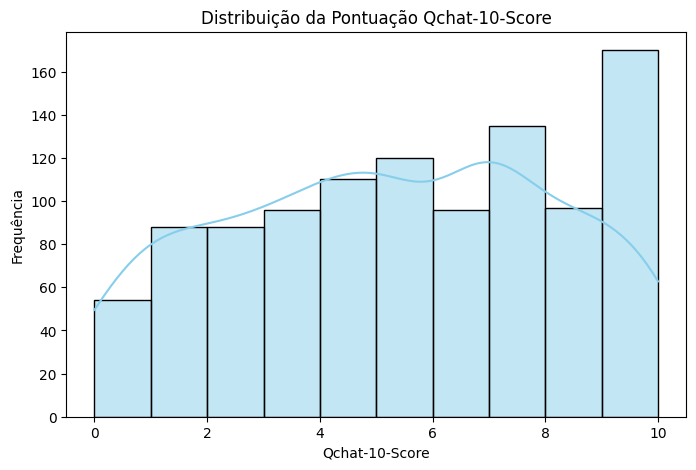

In [ ]:
# Convertendo 'Qchat-10-Score' para numérico, ignorando valores não numéricos
df['Qchat-10-Score'] = pd.to_numeric(df['Qchat-10-Score'], errors='coerce')

# 1. Análise da distribuição de pontuação Qchat-10-Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Qchat-10-Score'], kde=True, bins=10, color='skyblue')
plt.title("Distribuição da Pontuação Qchat-10-Score")
plt.xlabel("Qchat-10-Score")
plt.ylabel("Frequência")
plt.show()

<ipython-input-6-cf80579ff3f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ASD_Traits', palette='viridis')


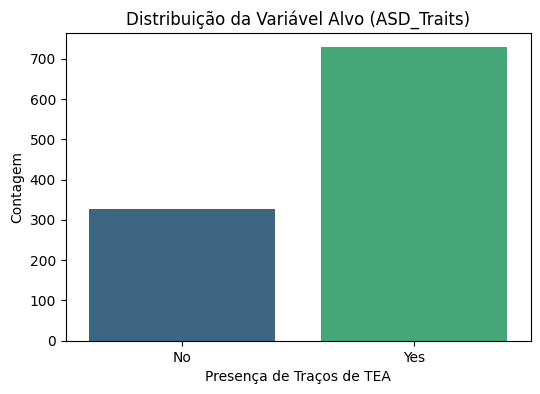

In [ ]:
# 2. Análise da variável alvo ASD_Traits
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ASD_Traits', palette='viridis')
plt.title("Distribuição da Variável Alvo (ASD_Traits)")
plt.xlabel("Presença de Traços de TEA")
plt.ylabel("Contagem")
plt.show()

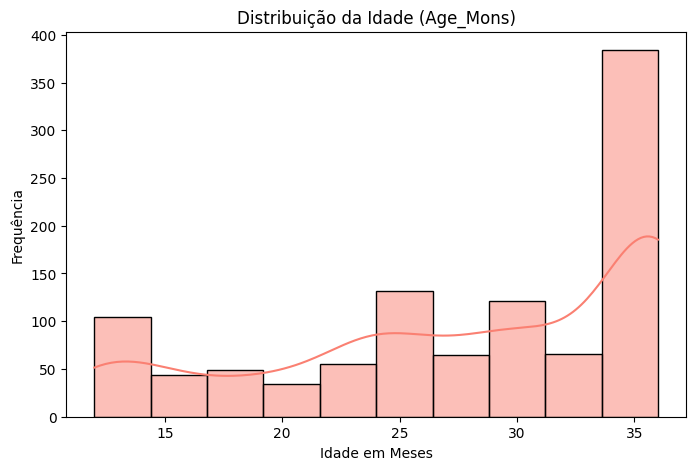

In [ ]:
# 3. Distribuição da idade em meses
plt.figure(figsize=(8, 5))
sns.histplot(df['Age_Mons'], kde=True, bins=10, color='salmon')
plt.title("Distribuição da Idade (Age_Mons)")
plt.xlabel("Idade em Meses")
plt.ylabel("Frequência")
plt.show()

#Pré-processamento

In [ ]:
# Codificação das variáveis categóricas
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Codificação de 'Sex'
df['Jaundice'] = LabelEncoder().fit_transform(df['Jaundice'])  # Codificação de 'Jaundice'
df['Family_mem_with_ASD'] = LabelEncoder().fit_transform(df['Family_mem_with_ASD'])  # Codificação de 'Family_mem_with_ASD'
df['ASD_Traits'] = LabelEncoder().fit_transform(df['ASD_Traits'])  # Codificação de 'ASD_Traits' (variável alvo)

# Variáveis independentes e variável dependente
X = df.drop(['ASD_Traits', 'Who completed the test', 'Ethnicity'], axis=1)
y = df['ASD_Traits']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando as variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Escolha e treinamento do modelo

In [ ]:
# Instanciando o modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo antes de qualquer transformação adicional
accuracy_initial = accuracy_score(y_test, y_pred)
classification_report_initial = classification_report(y_test, y_pred)
confusion_matrix_initial = confusion_matrix(y_test, y_pred)

# Exibindo os resultados
print("Acurácia inicial:", accuracy_initial)
print("\nRelatório de Classificação Inicial:\n\n", classification_report_initial)
print("\nMatriz de Confusão Inicial:\n", confusion_matrix_initial)


Acurácia inicial: 1.0

Relatório de Classificação Inicial:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       219

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317


Matriz de Confusão Inicial:
 [[ 98   0]
 [  0 219]]


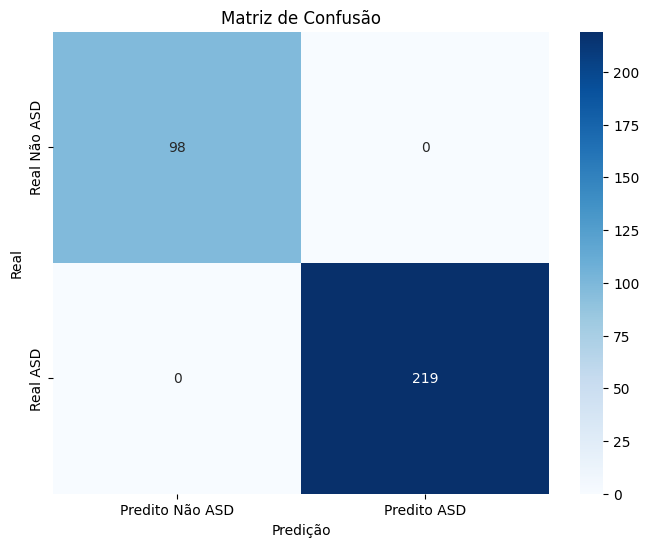

In [ ]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_initial, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predito Não ASD', 'Predito ASD'],
            yticklabels=['Real Não ASD', 'Real ASD'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

#Transformações e modificações nos dados da base

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Conversão e Tratamento de Valores Ausentes
df['Qchat-10-Score'] = pd.to_numeric(df['Qchat-10-Score'], errors='coerce')
df.dropna(inplace=True)  # Remove valores ausentes

# 2. Codificação das Variáveis Categóricas
# Codificação de 'Sex', 'Jaundice' e 'Family_mem_with_ASD'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Jaundice'] = label_encoder.fit_transform(df['Jaundice'])
df['Family_mem_with_ASD'] = label_encoder.fit_transform(df['Family_mem_with_ASD'])
df['ASD_Traits'] = label_encoder.fit_transform(df['ASD_Traits'])

# 3. Criação de Novas Variáveis ou Transformações de Recursos
# Criando faixas etárias (0-12 meses, 13-24 meses, etc.)
df['Age_Group'] = pd.cut(df['Age_Mons'], bins=[0, 12, 24, 36, 48, 60],
                         labels=['0-1 anos', '1-2 anos', '2-3 anos', '3-4 anos', '4-5 anos'])

# Transformando Qchat-10-Score em categorias de risco
df['Qchat_Risk'] = pd.cut(df['Qchat-10-Score'], bins=[0, 5, 10, 15, 20, 25],
                          labels=['Muito Baixo', 'Baixo', 'Moderado', 'Alto', 'Muito Alto'])

# Aplicando One-Hot Encoding em colunas categóricas derivadas, como Age_Group e Qchat_Risk
df = pd.get_dummies(df, columns=['Age_Group', 'Qchat_Risk'])

# 4. Escalonamento das Variáveis Numéricas
# Normalizando variáveis numéricas para garantir consistência na modelagem
scaler = StandardScaler()
numerical_features = ['Age_Mons', 'Qchat-10-Score'] + [f'A{i}_Score' for i in range(1, 11)]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Balanceamento de Classes com SMOTE
X = df.drop(['ASD_Traits', 'Who completed the test', 'Ethnicity'], axis=1)
y = df['ASD_Traits']

# Aplicando SMOTE se as classes estiverem desbalanceadas
if y.value_counts()[0] > y.value_counts()[1] * 1.5 or y.value_counts()[1] > y.value_counts()[0] * 1.5:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

# Verificando o novo balanceamento das classes
print("Distribuição das classes após o balanceamento:")
print(y.value_counts())

# Verificando o dataframe final após as transformações
print("Estrutura do DataFrame transformado:")
df.head()

Distribuição das classes após o balanceamento:
ASD_Traits
0    728
1    728
Name: count, dtype: int64
Estrutura do DataFrame transformado:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Age_Group_0-1 anos,Age_Group_1-2 anos,Age_Group_2-3 anos,Age_Group_3-4 anos,Age_Group_4-5 anos,Qchat_Risk_Muito Baixo,Qchat_Risk_Baixo,Qchat_Risk_Moderado,Qchat_Risk_Alto,Qchat_Risk_Muito Alto
1,-1.136356,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,...,True,False,False,False,False,False,False,False,False,False
2,0.880006,1.108300,-0.818758,-1.024980,-1.050615,0.856477,0.733952,-0.921479,-0.979340,-1.190559,...,True,False,False,False,False,False,False,False,False,False
3,0.880006,-0.902282,-0.818758,-1.024980,-1.050615,-1.167574,0.733952,1.085212,-0.979340,0.839941,...,True,False,False,False,False,False,False,False,False,False
4,0.880006,1.108300,1.221362,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,...,False,False,False,False,False,True,False,False,False,False
5,0.880006,1.108300,-0.818758,0.975629,0.951823,0.856477,0.733952,1.085212,1.021095,0.839941,...,False,False,False,False,False,True,False,False,False,False


#Impacto das transformações realizadas

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, conf_matrix

# 1. Conjunto Original (Sem Transformações)
# Dividir o conjunto de dados original em treino e teste
X_original = df.drop(['ASD_Traits', 'Who completed the test', 'Ethnicity'], axis=1)
y_original = df['ASD_Traits']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# Avaliar o modelo com o conjunto original
log_reg = LogisticRegression(random_state=42)
accuracy_orig, report_orig, conf_matrix_orig = train_and_evaluate_model(log_reg, X_train_orig, X_test_orig, y_train_orig, y_test_orig)

print("Desempenho com Conjunto Original:\n")
print("Acurácia:", accuracy_orig)
print("\nRelatório de Classificação:\n", report_orig)
print("Matriz de Confusão:\n", conf_matrix_orig)

# 2. Conjunto Transformado
# Dividir o conjunto de dados transformado em treino e teste
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X, y, test_size=0.3, random_state=42)

# Avaliar o modelo com o conjunto transformado
accuracy_trans, report_trans, conf_matrix_trans = train_and_evaluate_model(log_reg, X_train_trans, X_test_trans, y_train_trans, y_test_trans)

print("\nDesempenho com Conjunto Transformado:\n")
print("Acurácia:", accuracy_trans)
print("\nRelatório de Classificação:\n", report_trans)
print("Matriz de Confusão:\n", conf_matrix_trans)

Desempenho com Conjunto Original:

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       219

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317

Matriz de Confusão:
 [[ 98   0]
 [  0 219]]

Desempenho com Conjunto Transformado:

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       209

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

Matriz de Confusão:
 [[228   0]
 [  0 209]]
